<a href="https://colab.research.google.com/github/vandyahmad24/python_deeplearning/blob/master/Augmentor_Binari_2objek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Augmentor**

In [1]:
!pip install Augmentor

## **Masuk ke google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### **Ambil data dari hasil potong dan pindah ke folder tes**

In [21]:
!cp drive/My\ Drive/hasil_training_mobil/Mobilio/* drive/My\ Drive/dataset_training/test/mobilio

!cp drive/My\ Drive/hasil_training_mobil/Xenia/* drive/My\ Drive/dataset_training/test/xenia


### **Ambil data dari hasil potong dan pindah ke folder train**

In [22]:
!cp drive/My\ Drive/hasil_training_mobil/Mobilio/* drive/My\ Drive/dataset_training/train/mobilio

!cp drive/My\ Drive/hasil_training_mobil/Xenia/* drive/My\ Drive/dataset_training/train/xenia


## Sekarang, mari perbanyak masing-masing dataset train dan test dengan Augmentor.

In [25]:
import Augmentor
import os

def perbanyak_(ini, sebanyak_ini):
  source_dir = ini
  output_dir = "."
  p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
  p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=13, max_right_rotation=13)
  p.zoom_random(probability=0.5, percentage_area=0.9)
  p.crop_random(probability=0.6, percentage_area=0.9)
  p.resize(probability=1.0, width=64, height=64)

  p.sample(sebanyak_ini)

#sampel
#perbanyak_("dataset/test/5", 30)
#perbanyak_("dataset/test/s", 30)
#perbanyak_("dataset/train/5", 270)
#perbanyak_("dataset/train/s", 270)

perbanyak_("drive/My Drive/dataset_training/test/xenia", 150)
perbanyak_("drive/My Drive/dataset_training/test/mobilio", 150)
perbanyak_("drive/My Drive/dataset_training/train/xenia", 500)
perbanyak_("drive/My Drive/dataset_training/train/mobilio", 500)




Executing Pipeline:   0%|          | 0/150 [00:00<?, ? Samples/s]

Initialised with 33 image(s) found.
Output directory set to drive/My Drive/dataset_training/test/xenia/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B19480278>: 100%|██████████| 150/150 [00:04<00:00, 34.66 Samples/s]
Executing Pipeline:   0%|          | 0/150 [00:00<?, ? Samples/s]

Initialised with 6 image(s) found.
Output directory set to drive/My Drive/dataset_training/test/mobilio/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B1ACED080>: 100%|██████████| 150/150 [00:10<00:00, 14.85 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 3 image(s) found.
Output directory set to drive/My Drive/dataset_training/train/xenia/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B1940E6D8>: 100%|██████████| 500/500 [01:23<00:00,  5.99 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 6 image(s) found.
Output directory set to drive/My Drive/dataset_training/train/mobilio/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B1ACB8470>: 100%|██████████| 500/500 [00:33<00:00, 14.78 Samples/s]


## **Menampilkan 20 Foto dari folder train dan test**

In [26]:
import glob
import matplotlib.pyplot as plt
#%matplotlib inline

def tampilkan_6_kali_5_gambar_pada_alamat(ini):
  a = glob.glob(ini)

  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  columns = 6
  rows = 5
  for i in range(1, columns*rows +1):
      img = plt.imread(a[i])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()

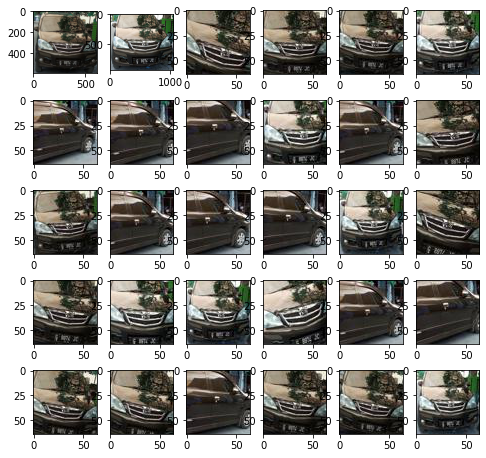

In [33]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_untuk_binary/test/xenia/*")

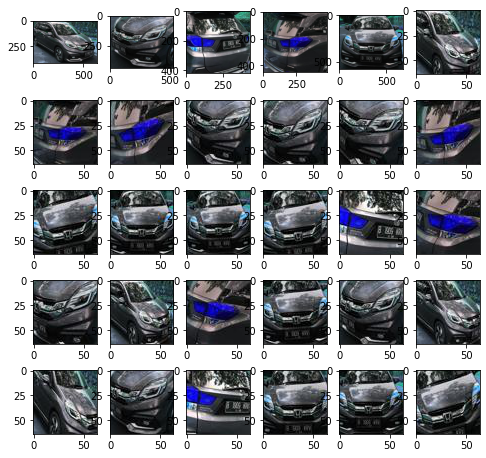

In [34]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_untuk_binary/test/mobilio/*")

## Fase Training

Pada fase training ini, dipergunakan arsitektur CNN sederhana yang terdiri atas 1 layer konvolusi, 1 layer pooling, 1 layer flatten, yang terkoneksi dengan 2 fully connected layer lainnya.

Hasil akhir penentuan ada pada bagian node paling akhir di mana

`model.add(Dense(units = 1, activation = 'sigmoid'))`

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator

size_ = 16

model = Sequential()

model.add(Conv2D(4, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

Berikut adalah arsitektur akhir CNN yang akan kita pergunakan.

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 4)         112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 196)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 1576      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


Sekarang, mari kita set konfigurasi di mana lokasi data train dan data test kita berada.

In [36]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory('drive/My Drive/dataset_untuk_binary/train', target_size = (size_, size_), batch_size = 32, class_mode = 'binary')
test_data = test.flow_from_directory('drive/My Drive/dataset_untuk_binary/test', target_size = (size_, size_), batch_size = 32, class_mode = 'binary')

Found 1009 images belonging to 2 classes.
Found 339 images belonging to 2 classes.


hapus pythoon checkpoint


In [38]:
!rm -rf "drive/My Drive/dataset_untuk_binary/test/.ipynb_checkpoints"
!rm -rf "drive/My Drive/dataset_untuk_binary/train/.ipynb_checkpoints"

In [39]:
model.fit_generator(train_data, steps_per_epoch = 100, epochs = 100, validation_data = test_data, validation_steps = 100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
 32/100 [========>.....................] - 2s 74ms/step - loss: 0.6827 - accuracy: 0.6026 - val_loss: 0.6798 - val_accuracy: 0.6165


In [42]:
a = "drive/My Drive/dataset_untuk_binary/test/mobilio/mobilio_0.jpg"
b = "drive/My Drive/dataset_untuk_binary/test/xenia/xenia_4.jpg"

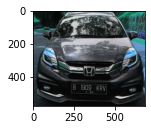

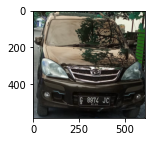

In [44]:
def tampilkan_(ini):
  fig = plt.figure(figsize=(2, 2))
  img = plt.imread(ini)
  plt.imshow(img)
  plt.show()

tampilkan_(a)
tampilkan_(b)

In [45]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

nama_train_data = switch_dict_key_values(train_data.class_indices)
print(nama_train_data)

{0: 'mobilio', 1: 'xenia'}


# **Hitung persentasi terdeteksi sebagai mobilio**

In [58]:
mobilio = glob.glob("drive/My Drive/dataset_untuk_binary/train/mobilio/*.jpg")
jumlah_data_mobilio = len(mobilio)
print(jumlah_data_mobilio)

506


In [59]:
from keras.preprocessing import image
import numpy as np

total = 0
for haha in mobilio:
  img = image.load_img(haha, target_size = (16, 16))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  print("File gambar [s] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0][0]], ".")
  total += (0 == hasil[0][0])*1
print(total/jumlah_data_mobilio)

File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[0]] alias terbaca sebagai ::  mobilio .
File gambar [s] diprediksi sebagai [[0]] alias terbaca sebagai ::  mobilio .
File gambar [s] diprediksi sebagai [[0]] alias terbaca sebagai ::  mobilio .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[0]] alias terbaca sebagai ::  mobilio .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[0]] alias terbaca sebagai ::  mobilio .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[0]] alias terbaca sebagai ::  mobilio .
File gambar [s] diprediksi sebagai [[0]] alias terbaca sebagai ::  mobilio .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar

# **Hitung persentasi terdeteksi sebagai xenia**

In [60]:
xenia = glob.glob("drive/My Drive/dataset_untuk_binary/train/xenia/*.jpg")
jumlah_data_xenia = len(xenia)
print(jumlah_data_xenia)

503


In [62]:
from keras.preprocessing import image
import numpy as np

total = 0
for haha in xenia:
  img = image.load_img(haha, target_size = (16, 16))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  print("File gambar [s] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0][0]], ".")
  total += (0 == hasil[0][0])*1
print(total/jumlah_data_xenia)

File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[0]] alias terbaca sebagai ::  mobilio .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[0]] alias terbaca sebagai ::  mobilio .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] diprediksi sebagai [[1]] alias terbaca sebagai ::  xenia .
File gambar [s] dipre